In [1]:
%matplotlib inline

In [94]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Feature Manipulation

## Of Asthma Disease Dataset

In this notebook, we will decide which features to use for modelling diagnosis.

In [4]:
# The data is already preprocessed
asthma_data = pd.read_csv("https://raw.githubusercontent.com/ShopyEsladuk/Asthma-Diagnosis/main/data/asthma_data_preprocessed.csv")

As we saw in 'Data Cleaning and Preprocessing' notebook, we do not need the factor of history of family member with asthma.

In [6]:
asthma_data = asthma_data.drop(columns = ["family_history_asthma"])

In [7]:
asthma_data.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis'],
      dtype='object')

Let's see what happens with lung functions. Forced expiratory volume (FEV1) calculates the amount of air that a person can force out of their lungs in 1 second. Forced vital capacity (FVC) is the total amount of air exhaled during the FEV test.

They seem to be reasonable factors for diagnosis of asthma.

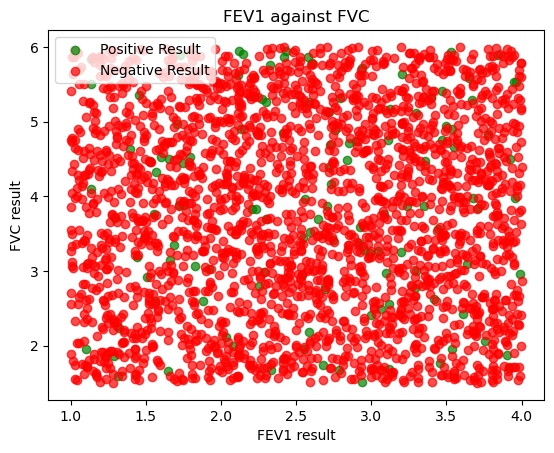

In [9]:
plt.scatter(
    asthma_data[asthma_data.diagnosis == 1].lung_function_fev1,
    asthma_data[asthma_data.diagnosis == 1].lung_function_fvc,
    c = "green",
    alpha = 0.7,
    label = "Positive Result"
)

plt.scatter(
    asthma_data[asthma_data.diagnosis == 0].lung_function_fev1,
    asthma_data[asthma_data.diagnosis == 0].lung_function_fvc,
    c = "Red",
    alpha = 0.7,
    label = "Negative Result"
)

plt.title("FEV1 against FVC")
plt.xlabel("FEV1 result")
plt.ylabel("FVC result")
plt.legend()

plt.show()

At first look, there is no connection between these two and asthma diagnosis

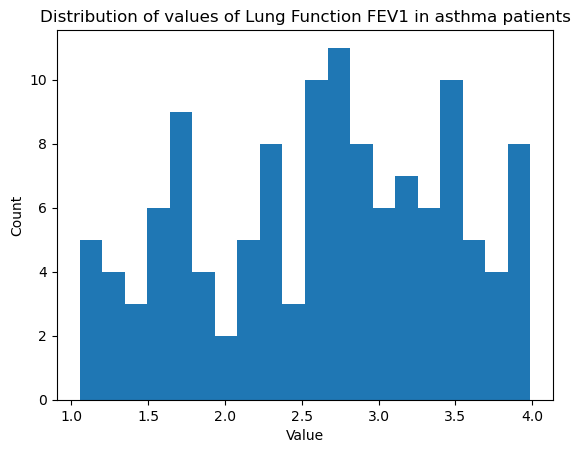

In [11]:
# FEV1

plt.hist(asthma_data[asthma_data.diagnosis == 1].lung_function_fev1, bins = 20)

plt.title("Distribution of values of Lung Function FEV1 in asthma patients")
plt.xlabel("Value")
plt.ylabel("Count")

plt.show()

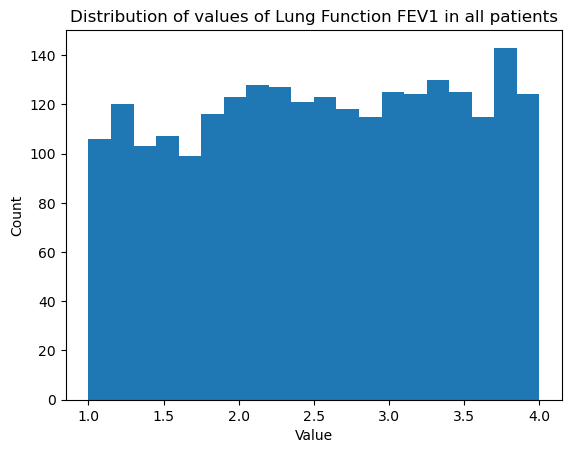

In [12]:
# FEV1

plt.hist(asthma_data.lung_function_fev1, bins = 20)

plt.title("Distribution of values of Lung Function FEV1 in all patients")
plt.xlabel("Value")
plt.ylabel("Count")

plt.show()

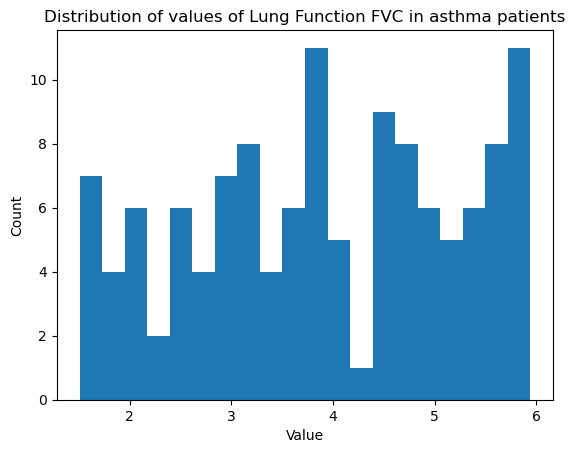

In [13]:
# FVC

plt.hist(asthma_data[asthma_data.diagnosis == 1].lung_function_fvc, bins = 20)

plt.title("Distribution of values of Lung Function FVC in asthma patients")
plt.xlabel("Value")
plt.ylabel("Count")

plt.show()

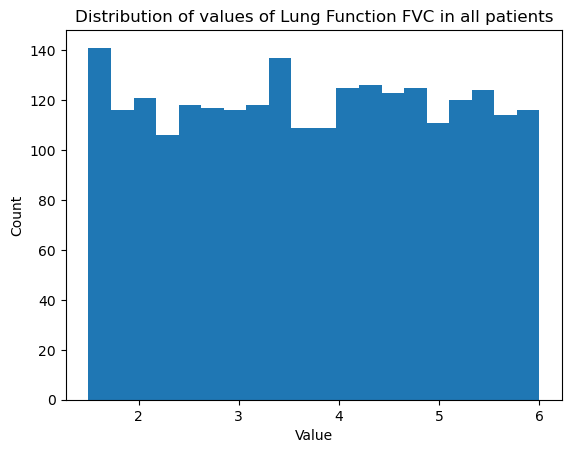

In [14]:
# FVC

plt.hist(asthma_data.lung_function_fvc, bins = 20)

plt.title("Distribution of values of Lung Function FVC in all patients")
plt.xlabel("Value")
plt.ylabel("Count")

plt.show()

Contrary to the first conclusion, patients with asthma tend to have higher results of both functions, we will leave them for now

In [16]:
asthma_data.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis'],
      dtype='object')

In [17]:
print("Male vs Female asthma patients")
asthma_data[asthma_data.diagnosis == 1].gender.value_counts()

Male vs Female asthma patients


gender
1    62
0    62
Name: count, dtype: int64

In [18]:
print("Male vs Female all patients")
asthma_data.gender.value_counts()

Male vs Female all patients


gender
0    1212
1    1180
Name: count, dtype: int64

There is not any connection with gender and positive diagnosis for me.

In [20]:
asthma_data = asthma_data.drop(columns = ["gender"])

In [36]:
print("Coughing symptoms in all patients")
asthma_data.coughing.value_counts()

Coughing symptoms in all patients


coughing
1    1204
0    1188
Name: count, dtype: int64

In [42]:
print("Coughing symptoms in asthma patients")
asthma_data[asthma_data.diagnosis == 1].coughing.value_counts()

Coughing symptoms in asthma patients


coughing
0    68
1    56
Name: count, dtype: int64

Wow, there does not seem to be any connection between coughing and ashtma diagnosis (unexpectedly for me).

Let's see the correlations.

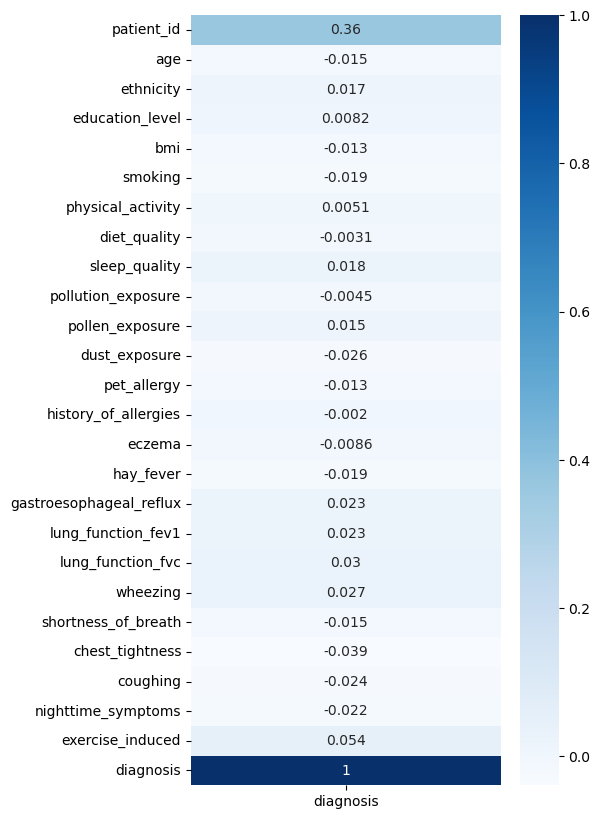

In [61]:
# We need enough space for feature labels
plt.figure(figsize=(5, 10))
sns.heatmap(asthma_data.corr()[["diagnosis"]], cmap = "Blues", annot = True)

plt.show()

Not that helpful. I think its time to remove ```patient_id```.

In [64]:
asthma_data = asthma_data.drop(columns = ["patient_id"])

Let's try to find differences between patients with positive and negative result in a faster, simpler way. Mean values of every feature in positive and negative diagnosis compared (I am really sorry for taking the means of categorical variables but my other suggested approaches are slow and not efficient). But it would be better if we did it with scaled values

In [106]:
scaler = MinMaxScaler(feature_range = (0, 1))

asthma_data_scaled = scaler.fit_transform(asthma_data)
asthma_data_scaled = pd.DataFrame(asthma_data_scaled, columns = asthma_data.columns)

asthma_data_scaled.describe()

,age,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,pollen_exposure,...,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,0.501864,0.223244,0.435758,0.489427,0.141722,0.505304,0.502141,0.503366,0.501304,0.511413,...,0.158027,0.516163,0.498119,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,0.291982,0.328707,0.299414,0.288598,0.348838,0.290530,0.291089,0.288996,0.293621,0.289341,...,0.364842,0.287341,0.289749,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243243,0.000000,0.333333,0.237900,0.000000,0.257812,0.242977,0.249727,0.243204,0.259962,...,0.000000,0.274619,0.246133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.333333,0.481706,0.000000,0.501812,0.511395,0.496164,0.503653,0.509836,...,0.000000,0.517723,0.496722,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.756757,0.333333,0.666667,0.742336,0.000000,0.754297,0.754354,0.754907,0.763059,0.770903,...,0.000000,0.764335,0.747676,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# Positive
positive_diagnosis_means = asthma_data_scaled[asthma_data_scaled.diagnosis == 1].describe().T[["mean"]]

# Negative
negative_diagnosis_means = asthma_data_scaled[asthma_data_scaled.diagnosis == 0].describe().T[["mean"]]

comparison_means = positive_diagnosis_means.rename(columns = {"mean" : "mean_positive"})
comparison_means["mean_negative"] = negative_diagnosis_means["mean"]
comparison_means["difference"] = comparison_means.mean_positive.values - comparison_means.mean_negative.values

comparison_means = comparison_means.drop(index = "diagnosis")

In [121]:
comparison_means.sort_values("difference", ascending = False)

,mean_positive,mean_negative,difference
exercise_induced,0.717742,0.598765,0.118977
wheezing,0.653226,0.593034,0.060192
lung_function_fvc,0.534827,0.496112,0.038715
gastroesophageal_reflux,0.193548,0.156085,0.037464
lung_function_fev1,0.544833,0.514595,0.030238
ethnicity,0.247312,0.221928,0.025384
sleep_quality,0.525635,0.502148,0.023488
pollen_exposure,0.530092,0.510391,0.019701
education_level,0.446237,0.435185,0.011051
physical_activity,0.511597,0.504960,0.006637


In [125]:
comparison_means.sort_values("mean_positive", ascending = False)

,mean_positive,mean_negative,difference
exercise_induced,0.717742,0.598765,0.118977
wheezing,0.653226,0.593034,0.060192
nighttime_symptoms,0.556452,0.604938,-0.048487
lung_function_fev1,0.544833,0.514595,0.030238
lung_function_fvc,0.534827,0.496112,0.038715
pollen_exposure,0.530092,0.510391,0.019701
sleep_quality,0.525635,0.502148,0.023488
physical_activity,0.511597,0.504960,0.006637
diet_quality,0.498221,0.502355,-0.004134
pollution_exposure,0.495610,0.501615,-0.006005


In [127]:
comparison_means.sort_values("mean_negative", ascending = False)

,mean_positive,mean_negative,difference
nighttime_symptoms,0.556452,0.604938,-0.048487
exercise_induced,0.717742,0.598765,0.118977
wheezing,0.653226,0.593034,0.060192
lung_function_fev1,0.544833,0.514595,0.030238
pollen_exposure,0.530092,0.510391,0.019701
chest_tightness,0.419355,0.507937,-0.088582
coughing,0.451613,0.506173,-0.054560
physical_activity,0.511597,0.504960,0.006637
age,0.482999,0.502896,-0.019897
diet_quality,0.498221,0.502355,-0.004134


In [123]:
asthma_data[asthma_data.diagnosis == 1].wheezing.value_counts()

wheezing
1    81
0    43
Name: count, dtype: int64

Conclusion: we can see that symptoms of asthma might be exercise induced. Also, wheezing is somehow typical for asthma (65% of patients expirience it) and higher lung function results might be associated with asthma. And also: nighttime symptoms, coughing, and chest tightness might be symptoms of something alse (however, a lot of times they are not).

In another conclusion, there aren't any clear asthma symptoms. All of the symptoms, seem to have high chance of being connected to something else. The only more significant factor is that more of asthma symptoms were induced when exercising. 
 
There is one more thing I want to check: columns with 1 on every boolean column (values only 0 and 1).

In [140]:
bool_columns = asthma_data.columns[asthma_data.max() == 1]

asthma_data[(asthma_data[bool_columns] == 1).all(axis=1)]

,age,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,pollen_exposure,...,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis


Well, there are not any.